Usage example of MediaPipe Face Mesh Solution API in Python (see also http://solutions.mediapipe.dev/face_mesh).

In [ ]:
!pip install mediapipe

Upload any image that contains face(s) to the Colab. We take two example images from the web: https://unsplash.com/photos/JyVcAIUAcPM and https://unsplash.com/photos/auTAb39ImXg

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving garrett-jackson-auTAb39ImXg-unsplash.jpg to garrett-jackson-auTAb39ImXg-unsplash (2).jpg
Saving hassan-khan-EGVccebWodM-unsplash.jpg to hassan-khan-EGVccebWodM-unsplash (2).jpg


garrett-jackson-auTAb39ImXg-unsplash (2).jpg


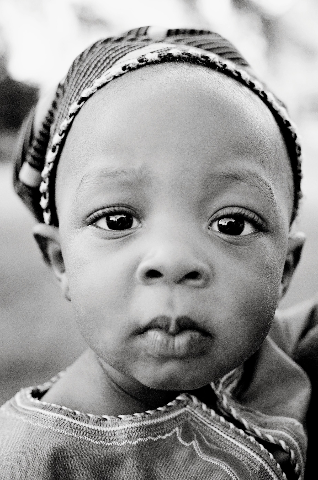

hassan-khan-EGVccebWodM-unsplash (2).jpg


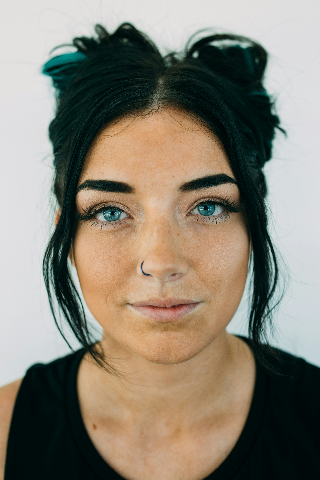

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as `mp_face_mesh = mp.solutions.face_mesh`.

You may change the parameters, such as `static_image_mode`, `max_num_faces`, and `min_detection_confidence`, during the initialization. Run `help(mp_face_mesh.FaceMesh)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Face Mesh.
 |  
 |  MediaPipe Face Mesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, refine_landmarks=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Face Mesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and

In [ ]:
# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Face landmarks of garrett-jackson-auTAb39ImXg-unsplash (2).jpg:


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


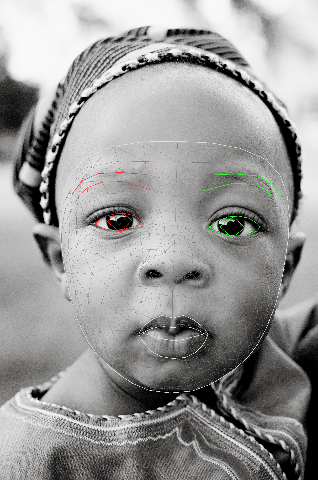

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Face landmarks of hassan-khan-EGVccebWodM-unsplash (2).jpg:


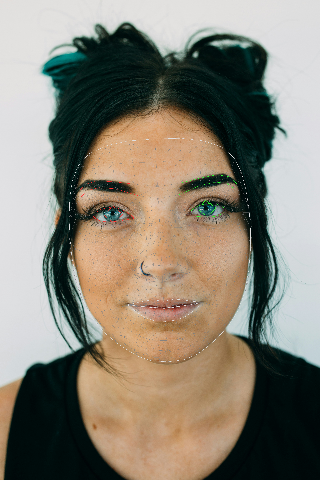

In [ ]:
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    print(results)

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
      resize_and_show(annotated_image)

In [ ]:
results.multi_face_landmarks[0].landmark[4]

x: 0.505702674
y: 0.552961171
z: -0.153648689

In [ ]:
# Function to apply blush effect
def apply_blush(image, landmarks, indices, color=(0, 0, 255), alpha=0.3):
    overlay = image.copy()
    points = []
    for idx in indices:
        landmark = landmarks[idx]
        x = int(landmark.x * image.shape[1])
        y = int(landmark.y * image.shape[0])
        points.append((x, y))

    if points:
        points = np.array(points, dtype=np.int32)
        cv2.fillConvexPoly(overlay, points, color)
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)




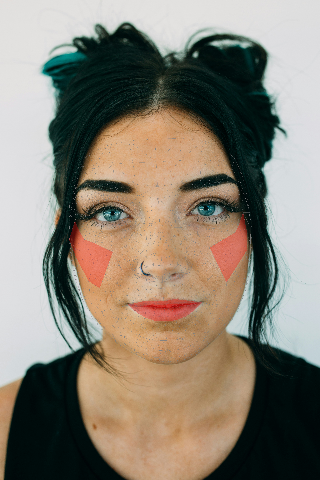

In [ ]:
# for image in images.items():
#   image = image[1]
  # Check if landmarks are detected
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Draw the full face mesh tesselation
        mp_drawing.draw_landmarks(
            image,
            face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

        # Define landmark indices for the cheek regions (revised indices)
        left_cheek_indices = [143,227,123,187,207,101,118,117,111]
        right_cheek_indices = [372,340,346,330,427,352,345]
        outer_lips_indices = [61,185,40,39,37,0,267,269,270,409,291,375,321,405,314,17,84,181,91,146]
        inner_lips_indices = [78,95,88,178,87,14,317,402,318,324,308,191,80,81,82,13,312,311,310,415,308]

        # left_eye_indices=[263,249,390,373,374,380,381,382,362,466,388,387,386,385,384,398,362]
        # # right_eye_indices=[469,454,323,310,311,312,313,314

        # Apply blush to the lips
        apply_blush(image, face_landmarks.landmark, outer_lips_indices, color=(0, 0, 255), alpha=0.3)
        apply_blush(image, face_landmarks.landmark, inner_lips_indices, color=(0, 0, 255), alpha=0.3)

        # Apply blush to the eyes
        # apply_blush(image, face_landmarks.landmark, left_eye_indices, color=(0, 0, 255), alpha=0.3)

        # Apply blush to the cheeks
        apply_blush(image, face_landmarks.landmark, left_cheek_indices, color=(0, 0, 255), alpha=0.3)
        apply_blush(image, face_landmarks.landmark, right_cheek_indices, color=(0, 0, 255), alpha=0.3)
# resize_and_show(image)

# Display the annotated image using cv2_imshow (for Colab)
# from google.colab.patches import cv2_imshow
# cv2_imshow(image)
resize_and_show(image)

In [ ]:
# cv2.imread(image_path)

camera = cv2.VideoCapture(0)

while True:
    _, frame = camera.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


AttributeError: 'NoneType' object has no attribute 'clip'